<a href="https://colab.research.google.com/github/atwoy/DSC-207R-Week-7/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Study Notebook

# UC San Diego OMDS DSC 207

### Importing Libraries

We will start by importing any relevant Python libraries. The code block below should be the place where you import all regular Python libraries (such as pandas, numpy, matplotlib, etc.)

In [ ]:
# Load libraries as relevant for this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Part 1: Regression (Consumer Goods Data and Investments Data)

We will perform linear regression to use our financial data to predict projected investments.

### 1.1 Datasets
We'll be using the a merged [dataset](https://drive.google.com/file/d/17tyrmrUQYaiia3zY6YgQy8LIUuM37hrd/view?usp=sharing) consisting of consumer_goods and investments and try to predict the Percentage Investment using Linear Regression. The dataset can be found here. Load this dataset into a dataframe `goods_investments` and have a look at it using head, info and describe methods. [0.5 pt]<br>
<br><br>

In [ ]:
goods_investments = "https://raw.githubusercontent.com/atwoy/DSC-207R-Week-7/main/goods_investments.csv"
df = pd.read_csv(goods_investments)

In [ ]:
df.head()

,Store Number,Convenience,Shopping,Specialty,Unsought,Other,Percentage Investment
0,1101,301121,42712,169038,89371,296474,18.8
1,1101,9473,326,5276,3871,8943,18.8
2,1103,99476,9576,45791,44109,109323,15.8
3,1103,78919,6537,41600,30782,81220,15.8
4,1103,30401,1588,17791,11022,29601,15.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4636 entries, 0 to 4635
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store Number           4636 non-null   int64  
 1   Convenience            4636 non-null   int64  
 2   Shopping               4636 non-null   int64  
 3   Specialty              4636 non-null   int64  
 4   Unsought               4636 non-null   int64  
 5   Other                  4636 non-null   int64  
 6   Percentage Investment  4636 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 253.7 KB


In [ ]:
df.describe()

,Store Number,Convenience,Shopping,Specialty,Unsought,Other,Percentage Investment
count,4636.000000,4.636000e+03,4636.000000,4.636000e+03,4.636000e+03,4.636000e+03,4636.000000
mean,29981.877696,4.132596e+04,3616.043788,1.902213e+04,1.868779e+04,4.138169e+04,15.041393
std,15136.976829,1.154726e+05,12116.007845,5.179389e+04,6.093743e+04,1.173996e+05,5.674065
min,1101.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.000000e+00,3.500000
25%,17203.000000,5.914750e+03,359.750000,2.490500e+03,1.954000e+03,5.801000e+03,10.900000
50%,29169.000000,1.318200e+04,894.500000,6.455500e+03,4.965000e+03,1.300250e+04,14.600000
75%,42133.000000,3.341150e+04,2518.250000,1.577825e+04,1.357300e+04,3.311100e+04,17.800000
max,55141.000000,3.030964e+06,293958.000000,1.476387e+06,1.842859e+06,2.824311e+06,48.600000


### 1.2 Train and test split [1 pt]
1. Shuffle your data (optional)
2. Partition it into an 80%/20% train/test split using train_test_split.<br>

Note: The store number column would not likely contribute towards a prediction. Hence, it would be better to drop the column before splitting.

X_train and X_test should have these columns: `Convenience`, `Shopping`, `Specialty`, `Unsought`, `Other`<br>
y_train and y_test should have this column: `Percentage Investment`<br>
<br><br>

In [ ]:
X = df.drop(columns=["Store Number", "Percentage Investment"])
y = df["Percentage Investment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

print(X_train.columns)
print(y_train.name)

Index(['Convenience', 'Shopping', 'Specialty', 'Unsought', 'Other'], dtype='object')
Percentage Investment


#### 1.3 Print out the shapes of X_train, X_test, y_train, y_test [0.5 pt]

In [ ]:
print('X_train : ')
print(X_train.shape)
print('X_test : ')
print(X_test.shape)
print('y_train : ')
print(y_train.shape)
print('y_test : ')
print(y_test.shape)

X_train : 
(3708, 5)
X_test : 
(928, 5)
y_train : 
(3708,)
y_test : 
(928,)


#### 1.4 Fit a regressor

Create a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model</a> and fit it to your training dataset. [0.5 pt]<br>


In [ ]:
from sklearn.linear_model import LinearRegression

# Define the model, then fit the model
investment_regression = LinearRegression()

# make object
# use the fit() function of the model object(use the training data here)
# use predict() function of the model object (use the testing data here, and training because the question asks for it)

#### 1.5 Use your model to predict on your test set. [0.5 pt]


In [ ]:
investment_predictions = LinearRegression()

#### 1.6 Report the RMSE of the prediction. (The [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) library is useful. Note - We want to find the root of MSE). [0.5 pt]

In [ ]:
# Steps
# 1. Define an object using a class (model <- LR())
# 2. Train the model (model.fit(x_train, y_train))
# 3. Once we fit the model, test it (y_pred <- model.predict(x_test))
# 4. Pass the values (y_test and y_pred) to the error function (from sklearn.metrics import mean_squared_error)

from sklearn.metrics import mean_squared_error

LinearRegression = LinearRegression ()
LinearRegression.fit(X_train, y_train)
y_pred = LinearRegression.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

5.446947188614022


<!-- BEGIN QUESTION -->

#### 1.7 Print the intercept value of the linear regression, along with the coefficients of each of the input features. [1 pt]

In [ ]:
# Your code here
from sklearn.linear_model import LinearRegression

LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)
y_pred = LinearRegression.predict(X_test)

print(LinearRegression.intercept_)

15.141050104553017


# Part 2: Classification

### **Instructions**

Out of the three classifiers taught this week (decision trees, logistic regression, Naive Bayes), you must implement two of them.

You will follow the steps for each classifier model that you implement:
- Defining the model.
- Fit the classifier defined in step 4 on the training data (X_train, y_train).
- Generate a list predictions_train containing all the grade predictions for the train set.
- Generate a list predictions_test containing all the grade predictions for the test set.
- Calculate the accuracy of your model on the train and test sets.

### The Dataset

For your classification tasks, you will work on weather data. The goal is to classify the weather being high_humidity or not based on other weather conditions.

Here is a pre-processed version of the [dataset](https://drive.google.com/file/d/11mKR0uGIk8ZCG2jmk0m_GxiYPLq6rAfc/view?usp=share_link)


### Load Data

Load the dataset into a dataframe `df`. The url to retrieve the data from can be found here: https://raw.githubusercontent.com/dsc207rfall2023/fa23course-dsc207r/main/assignments/Week%207/input_data/humidity.csv. Read this data into a pandas dataframe `df`

In [ ]:
dataset_url = "https://raw.githubusercontent.com/dsc207rfall2023/fa23course-dsc207r/main/assignments/Week%207/input_data/humidity.csv"
df = pd.read_csv(dataset_url)

<!-- END QUESTION -->

### Importing Machine Learning Libraries

You will need to import machine learning libraries of your choice for performing different tasks in this assignment. Update this cell with each import and re-run it to update your notebook.

In [ ]:
# Import relevant machine learning libraries in this cell as relevant for this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

<!-- BEGIN QUESTION -->

### 2.1 Understanding the Data

##### Get information about the various columns of the dataframe using head, describe and info methods of dataframes. [1 pt]

In [ ]:
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,1


In [ ]:
df.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,high_humidity_label
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,918.903180,65.022609,142.306756,5.485793,148.480424,6.999714,0.182023,266.393697,0.497180
std,3.179040,11.168033,69.149472,4.534427,67.154911,5.590790,1.534493,1503.092216,0.500227
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,0.000000
25%,916.595376,57.398000,65.979244,2.245529,76.335351,3.064608,0.000000,0.000000,0.000000
50%,918.942281,65.778479,165.937461,3.869906,176.350000,4.943637,0.000000,0.000000,0.000000
75%,921.169054,73.530872,191.100000,7.264463,201.125000,8.747888,0.000000,0.000000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   high_humidity_label     1064 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 74.9 KB


<!-- BEGIN QUESTION -->

### 2.2 Generate a [histogram graph for counts for all values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).
Set the figsize parameter to a suitable size for readability. You need not plot each histogram individually. Instead use the provided reference to plot the distributions together like the sample below. [0.5 pt]

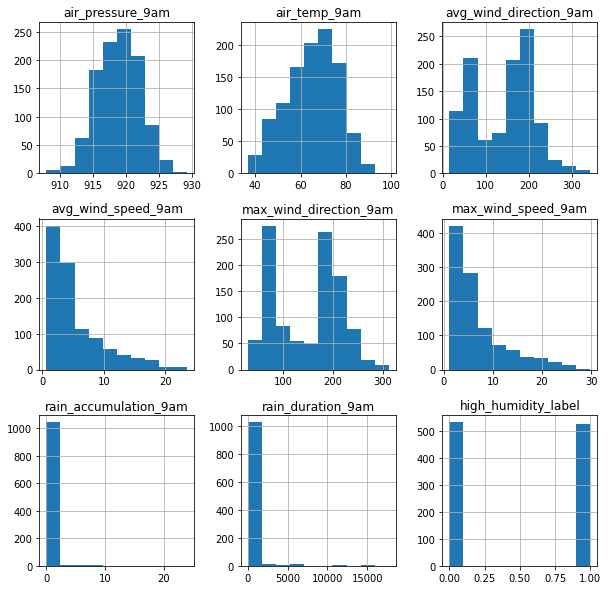

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x1000 with 0 Axes>

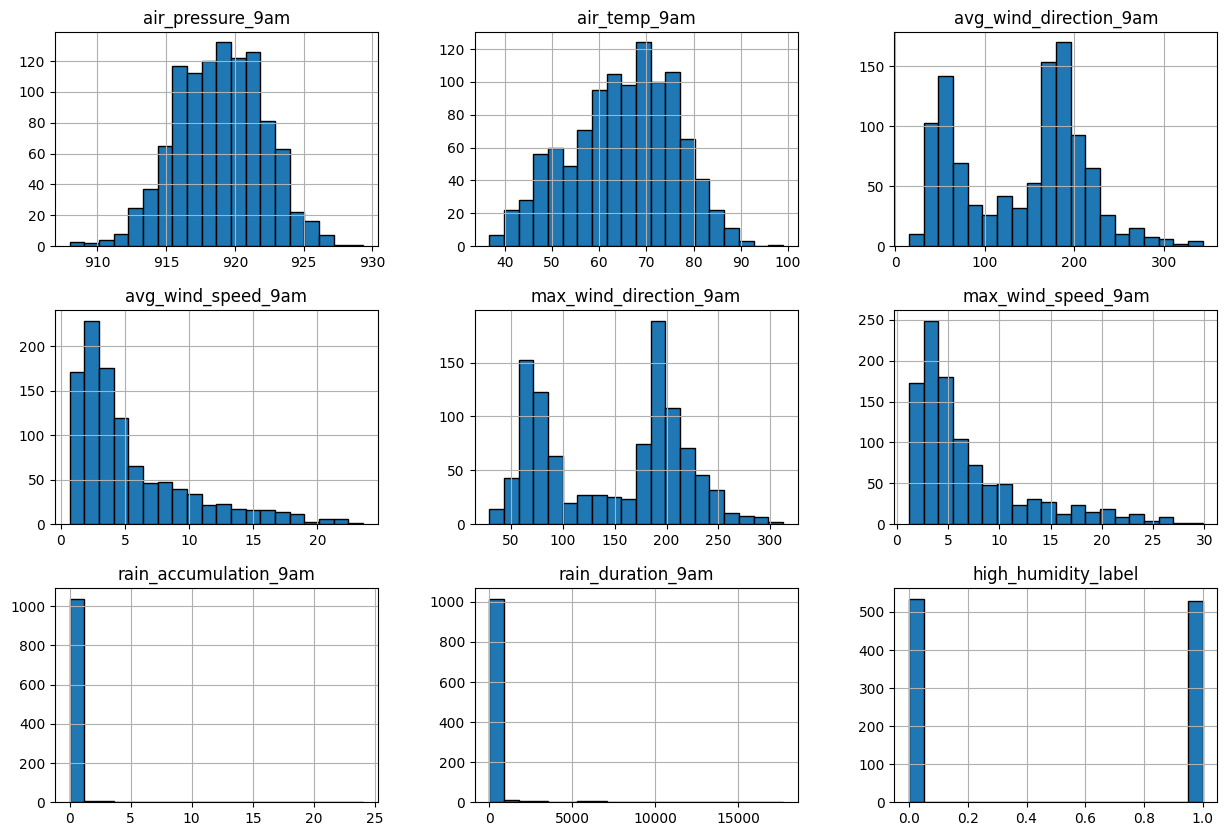

In [ ]:
plt.figure(figsize=(15,10))
df.hist(bins=20, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.tight_layout
plt.show

<!-- END QUESTION -->

### 2.3 Preparing the input fields and target variable [0.5 pt]

1. We want to create a dataframe of features `X` without the labels.
2. We want to remove the target variable `label` and store it another dataframe `y`.



In [ ]:
X = df.drop(columns=['high_humidity_label'])
y = df['high_humidity_label']
df = df.drop(columns=['high_humidity_label'])

### 2.4 Preparing train and test sets [0.5 pt]

Split data into training(80%) and test(20%) set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with some value of random_state.

After this step, you should have 4 dataframes - `X_train, X_test, y_train, y_test`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

##2.5 Classifier #1

### 2.5.1 Defining the first classifier model [0.5 pt]

Choose either a decision tree, logistic regression, or Naive Bayes model.
Import and create a classifier model called `clf_1`.

In [ ]:
clf_1 = DecisionTreeClassifier()

### 2.5.2 Fit the classifier on the training data (X_train, y_train) [0.5 pt]

In [ ]:
clf_1.fit(X_train, y_train)

DecisionTreeClassifier()

### 2.5.3 Generate predictions for train

Generate a list `predictions_train` containing all the grade predictions for the train set [0.5 pt]

In [ ]:
predictions_train1 = clf_1.predict(X_train)

### 2.5.4 Generate predictions for train

Generate a list `predictions_test` containing all the grade predictions for the test set [0.5 pt]

In [ ]:
predictions_test1 = clf_1.predict(X_test)

<!-- BEGIN QUESTION -->

### 2.5.5 Calculate accuracy

Find the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of **train** set for your model using above predictions. (Make sure you have imported the library) [0.5 pt]

In [ ]:
# We want the model to learn from the data so we can make choices
# To do this and ensure this, we split the data into two categories: training and testing
# Model is kind of like the student's test and we want its answers to match the initial test answer key
from sklearn.metrics import accuracy_score
predictions_train1 = clf_1.predict(X_train)
accuracy_score(y_train, predictions_train1)

1.0

<!-- END QUESTION -->

Find the accuracy of test set for your model using above predictions. [0.5 pt]

In [ ]:
predictions_test1 = clf_1.predict(X_test)
accuracy_score(y_test, predictions_test1)

0.812206572769953

<!-- BEGIN QUESTION -->

Which accuracy (test or train) is higher? Why? [0.5 pt]

The train accuracy is higher because the model is optimized for the train accuracy.



## 2.6 Classifier #2

### 2.6.1 Defining the second classifier model [0.5 pt]

Choose either a decision tree, logistic regression, or Naive Bayes model. This must be a different model from your first classifier! Import and create a classifier model called `clf_12`.

In [ ]:
clf_2 = LogisticRegression()

### 2.6.2 Fit the classifier on the training data (X_train, y_train) [0.5 pt]

In [ ]:
clf_2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 2.6.3 Generate predictions for train

Generate a list `predictions_train` containing all the grade predictions for the train set [0.5 pt]

In [ ]:
predictions_train2 = clf_2.predict(X_train)

### 2.6.4 Generate predictions for train

Generate a list `predictions_test` containing all the grade predictions for the test set [0.5 pt]

In [ ]:
predictions_test2 = clf_2.predict(X_test)

<!-- BEGIN QUESTION -->

### 2.6.5 Calculate accuracy

Find the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of **train** set for your model using above predictions. (Make sure you have imported the library) [0.5 pt]

In [ ]:
from sklearn.metrics import accuracy_score
predictions_train2 = clf_2.predict(X_train)
accuracy_score(y_train, predictions_train2)

0.7226792009400705

<!-- END QUESTION -->

Find the accuracy of test set for your model using above predictions. [0.5 pt]

In [ ]:
predictions_test2 = clf_2.predict(X_test)
accuracy_score(y_test, predictions_test2)

0.6995305164319249

<!-- BEGIN QUESTION -->

Which accuracy (test or train) is higher? Why? [0.5 pt]

The train accuracy is higher because the model is optimized for the train accuracy.

## 2.7: Video

Create a video with the following components:
* Explain why you chose the two classifier models you chose in part 2. [1 pt]
* Explain the steps you took to code each model briefly (creating the model, fitting the classifier to the data, generating predictions, calculating accuracy). Also explain how you generated train/test sets. [2 pts]
* Compare the results of both the models based on your generated accuracies. [1 pt]


Additionally (and this is important), ensure you follow the format the video submission. If one of these criteria is missing, we will not grade the video.
* Show some form of ID at the start of the video so we know who you are.
* Show your code in the video by screensharing.
* Show your face in the video.



LINK TO YOUR VIDEO HERE:
https://fhda-edu.zoom.us/rec/share/NYyu6z5fJMdmwdViOYPu5E0suN7Ke8d6ZXlPdmguWVdyGwk22LDEw9m9hSeRfmDQ.jsAJ7nwL9GHedzZI?startTime=1740555648000

# Submission

Before you submit your notebook, ensure that you've run all the cells sequentially to display images, graphs, and outputs correctly. Take the time to review your solutions and evaluate using the public test cases. Once you're satisfied, save your notebook by navigating to "File" in the Jupyter Notebook menu and selecting "Save" or using the keyboard shortcut (usually Ctrl + S or Cmd + S).

To submit, export your notebook as an .ipynb file. Ensure it's saved with the same name as the assignment. Then, upload this .ipynb file to Gradescope. Remember to submit the correct version.

Please save your work before exporting it, and if you encounter any technical issues or have questions about the submission process, reach out to the course staff for assistance